In [58]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
db_path = '/Users/chris/Desktop/Data Science/nfts.sqlite'
conn = sqlite3.connect(db_path)
c = conn.cursor()

# EDA

## Who owns the most NFTs?

In [3]:
majority_owners = """
select owner, count(owner) as num_owned
from current_owners
group by owner
order by num_owned desc
limit 10;
"""

c.execute(majority_owners)
mo = c.fetchall()

In [4]:
mo_df = pd.DataFrame(mo)
mo_df.columns = ['owner', 'num_NFTs']

In [5]:
mo_df

,owner,num_NFTs
0,0x02E4103b8A3c55AcDDF298311a9928f9Fe27822C,100045
1,0x0000000000000000000000000000000000000000,83548
2,0xE052113bd7D7700d623414a0a4585BCaE754E9d5,51028
3,0xcDA72070E455bb31C7690a170224Ce43623d0B6f,50131
4,0x96bEE49d3386d674bF4E956D9B3ce61b9540409D,36751
5,0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa,32905
6,0xBa0d01220a7CeA942596123102535F800f558763,32691
7,0x000000000000000000000000000000000000dEaD,19758
8,0x0008d343091EF8BD3EFA730F6aAE5A26a285C7a2,12137
9,0xD387A6E4e84a6C86bd90C158C6028A58CC8Ac459,11497


## What is the price distribution of NFTs?
not enough detail in the hist

In [12]:
price_dist = """
select market_value 
from current_market_values
"""

c.execute(price_dist)
p = c.fetchall()

In [13]:
p_df = pd.DataFrame(p)
p_df.columns = ['prices']

In [19]:
p_df.max()

prices    1.890000e+22
dtype: float64

(0.0, 7500000.0)

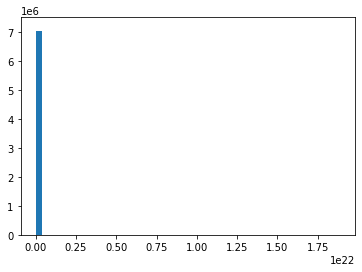

In [71]:
hist = plt.hist(p_df['prices'], bins = 50)
axes = plt.gca()
axes.set_ylim([0,7500000])

### Found
-

## How many NFTs are minted per day?

In [22]:
mint = """
select timestamp, count(timestamp)
from mints 
group by timestamp;
"""

c.execute(mint)
m = c.fetchall()

In [24]:
m_df = pd.DataFrame(m)
m_df.columns = ['mint timestamp', 'count']

In [25]:
m_df

,mint timestamp,count
0,1617235206,2
1,1617235214,4
2,1617235218,2
3,1617235225,1
4,1617235235,2
...,...,...
709119,1632586509,19
709120,1632586523,5
709121,1632586528,7
709122,1632586532,7


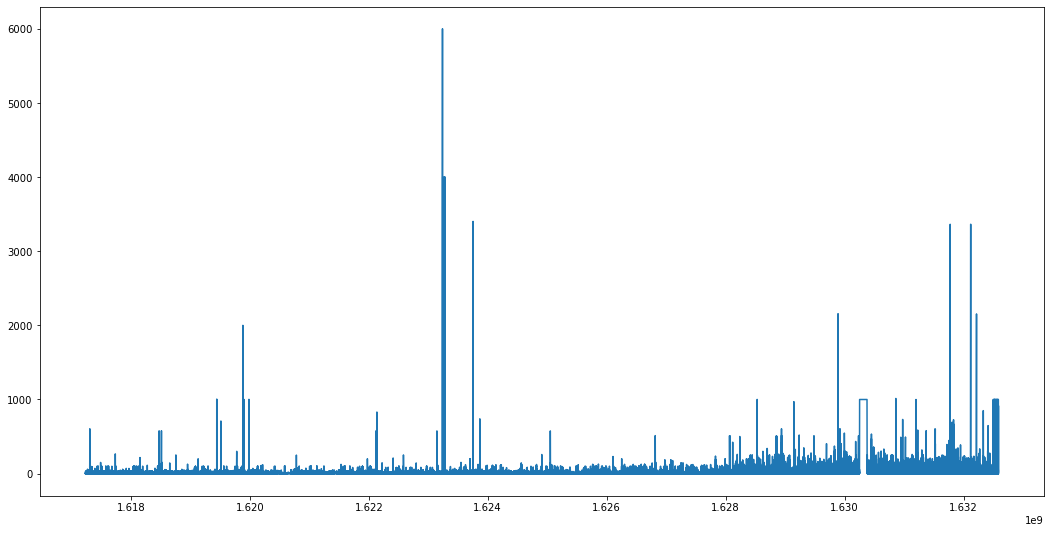

In [37]:
plt.figure(figsize=(18,9))
plt.plot(m_df['mint timestamp'], m_df['count'])
plt.show()

In [59]:
np.average(m_df['count'])

9.402138413027904

### SQL Run

select timestamp, count(timestamp) as num_mint
from mints 
group by timestamp
order by num_mint DESC
limit 10;

select distinct nft_address 
from mints 
where timestamp = 1623239540;

select *
from nfts
where address = '0xe38251813B08C2c048B0582A52501acA5Df0BaAb';

### Found
1. Max minted in day is 6000 
    - Two such days from single NFT Project: Crypto stamp Edition 3
        - 1623239540
        - 1623238706
2. Average number of NFTs minted daily 
    - 9.4 NFTs 


## Most Valueable Projects 
integer overflow

In [39]:
val = """
select 
    nfts.name, 
    nfts.symbol, 
    current_market_values.market_value
from nfts
inner join current_market_values
on nfts.address = current_market_values.nft_address
group by nfts.name
order by current_market_values.market_value
limit 10; 
"""

c.execute(val)
v = c.fetchall()

OperationalError: integer overflow

In [40]:
v_df = pd.DataFrame(v)

NameError: name 'v' is not defined

## Distribution of Time hold after minting

In [41]:
holding = """
select * 
from mint_holding_times
"""

c.execute(holding)
h = c.fetchall()

In [44]:
h_df = pd.DataFrame(s)
h_df.columns = ['days', 'count']

<BarContainer object of 177 artists>

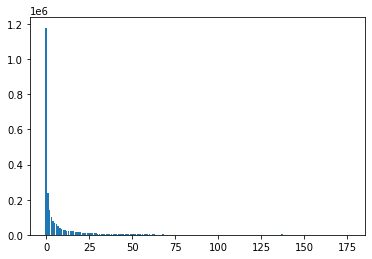

In [53]:
plt.bar(h_df['days'], h_df['count'])

In [65]:
day = s_df['count'][0]/s_df['count'].sum()
day

0.4708544987779065

In [66]:
week = s_df[s_df['days'] < 7]['count'].sum()/s_df['count'].sum()
week

0.7462355566686679

### Found
- Heavily skewed right
    - 47.1% of the time people sell within the same day as minting
    - 74.6% of the time people sell within the first week
- Majority of people are flipping NFTs
 

## Price of NFTs straight from mint

In [72]:
mint_p = """
select transaction_value 
from mints
"""

c.execute(mint_p)
mp = c.fetchall()

In [74]:
mp_df = pd.DataFrame(mp)

In [77]:
mp_df.max()

0    1.890000e+22
dtype: float64

(array([6.667016e+06, 1.660000e+02, 5.800000e+01, 2.300000e+01,
        8.000000e+00, 5.000000e+00, 4.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([0.000e+00, 1.890e+21, 3.780e+21, 5.670e+21, 7.560e+21, 9.450e+21,
        1.134e+22, 1.323e+22, 1.512e+22, 1.701e+22, 1.890e+22]),
 <BarContainer object of 10 artists>)

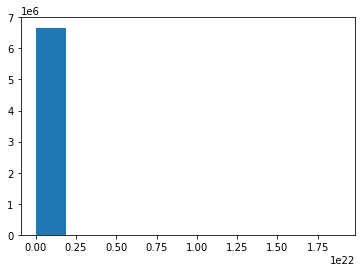

In [76]:
plt.hist(mp_df)